<a href="https://colab.research.google.com/github/AlfarRafeek/DSPL-cw1/blob/main/DSPL_Project_Preprocessing_EDA_KNN_SVM_RF_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing & EDA

In [ ]:
# Step 1: Upload Both Files
from google.colab import files
print("Upload train.csv and test.csv now...")
uploaded = files.upload()

Upload train.csv and test.csv now...


Saving test.csv to test.csv
Saving traincsv.csv to traincsv.csv


* **Justification**:
This step allow to upload the **train.csv** and **test.csv** files to the Google Colab. Uploading the datasets is the first step in any data analysis or machine learning project, as the data is the foundation for all subsequent steps. The **files.upload()** function provides an easy way to load files into the Colab runtime.


In [ ]:
# Step 2: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

* **Justification**: This step imports all the necessary libraries for data manipulation, visualization, preprocessing, and analysis. Each library serves a specific purpose:
    * **Pandas** for data manipulation.
    * **NumPy** for numerical computations.
    * **Matplotlib** and **Seaborn** for data visualization.
    * **MinMaxScaler** for scaling data.
    * **zscore** for outlier detection.
    * **warnings** to suppress non-critical warnings for cleaner output.


In [ ]:
# Step 3: Load Datasets
train_df = pd.read_csv("traincsv.csv")
test_df = pd.read_csv("test.csv")

* **Justification**: This step loads the training and testing datasets into Pandas DataFrames. Loading the data is essential for performing any analysis or modeling. The training dataset is used to train the model, while the testing dataset is used to evaluate its performance.


In [ ]:
# Step 4: Display Initial Info
print("\n Train Data Info:")
print(train_df.info())
print("\n Test Data Info:")
print(test_df.info())


 Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774155 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774153 non-null  float64
 1   outlet_city       774153 non-null  object 
 2   luxury_sales      774120 non-null  object 
 3   fresh_sales       774114 non-null  object 
 4   dry_sales         774125 non-null  object 
 5   cluster_catgeory  774154 non-null  object 
dtypes: float64(1), object(5)
memory usage: 35.4+ MB
None

 Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40749 entries, 0 to 40748
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Customer_ID   40749 non-null  int64 
 1   outlet_city   40749 non-null  object
 2   luxury_sales  40749 non-null  object
 3   fresh_sales   40749 non-null  object
 4   dry_sales     40749 non-null  object
dtypes: i

* **Justification**: This step provides a summary of the datasets, including the number of rows, columns, data types, and missing values. Understanding the structure of the data is crucial for identifying potential issues (e.g., missing values, incorrect data types) before proceeding with analysis or modeling.


In [ ]:
# Step 5: Convert Sales Columns to Numeric
sales_cols = ['luxury_sales', 'fresh_sales', 'dry_sales']
for col in sales_cols:
    train_df[col] = pd.to_numeric(train_df[col], errors='coerce')
    test_df[col] = pd.to_numeric(test_df[col], errors='coerce')

* **Justification**: This step ensures that the sales columns are in numeric format. Numeric data is required for mathematical operations, statistical analysis, and machine learning algorithms. The **errors='coerce'** argument converts any non-numeric values to **NaN**, which can then be handled appropriately.


In [ ]:
# Step 6: Handle Missing Values (Median Imputation)
for col in sales_cols:
    train_df[col] = train_df[col].fillna(train_df[col].median())
    test_df[col] = test_df[col].fillna(test_df[col].median())

* **Justification**: Missing values can cause errors or bias in analysis and modeling. This step fills missing values in the sales columns with the median, which is a robust method for handling missing numeric data. The median is less sensitive to outliers compared to the mean.


In [ ]:
# Step 7: Drop Duplicates
train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)

* **Justification**: Duplicate rows can skew analysis and model training by overrepresenting certain data points. This step removes duplicate rows to ensure that each row is unique and contributes equally to the analysis.


In [ ]:
# Step 8: Remove Outliers from Train Data (Z-score method)
z_scores = np.abs(zscore(train_df[sales_cols]))
train_df = train_df[(z_scores < 3).all(axis=1)]

* **Justification**: Outliers can negatively affect model performance by introducing bias or overfitting. This step uses the Z-score method to identify and remove outliers from the training dataset. A Z-score threshold of 3 is commonly used to identify extreme values.


In [ ]:
# Step 9: Summary Stats
print("\n Summary Statistics - Train Data:")
display(train_df.describe().T)
print("\n Summary Statistics - Test Data:")
display(test_df.describe().T)


 Summary Statistics - Train Data:


,count,mean,std,min,25%,50%,75%,max
Customer_ID,746445.0,1.038704e+07,223482.781035,10000000.0,10193455.00,10387013.00,10580591.00,10774154.00
luxury_sales,746447.0,1.797614e+03,772.737925,500.0,1196.34,1677.34,2253.59,4359.04
fresh_sales,746447.0,4.398463e+03,3389.400266,500.0,1586.10,3179.84,6830.20,13997.90
dry_sales,746447.0,4.655409e+03,3467.610558,500.0,1753.92,3521.76,7322.28,13999.30



 Summary Statistics - Test Data:


,count,mean,std,min,25%,50%,75%,max
Customer_ID,40749.0,20375.000000,11763.367396,1.0,10188.00,20375.000,30562.00,40749.00
luxury_sales,40749.0,1927.113861,1003.766320,500.8,1220.40,1721.720,2346.12,6985.65
fresh_sales,40749.0,4442.831654,3349.366896,500.3,1619.55,3369.030,6696.95,13995.10
dry_sales,40749.0,4691.510246,3410.980517,500.9,1799.52,3755.345,7183.44,13989.50


* **Justification**: This step provides descriptive statistics (e.g., mean, median, standard deviation) for the numeric columns in the datasets. Summary statistics help identify patterns, detect anomalies, and understand the scale and spread of the data.


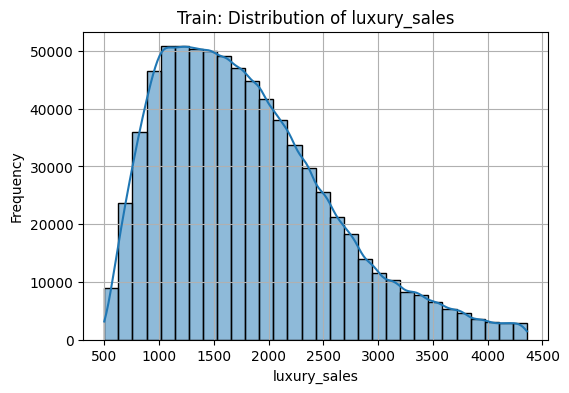

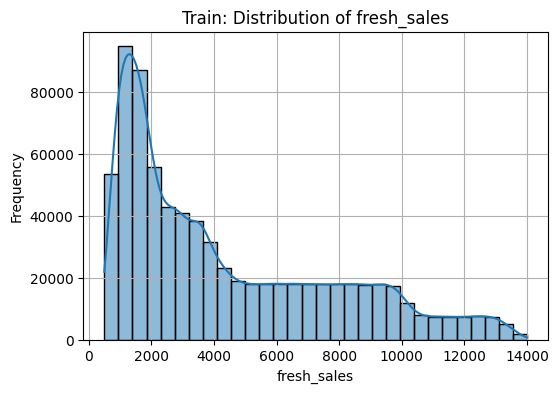

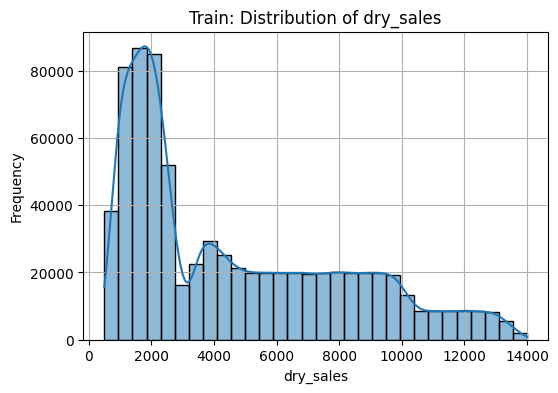

In [ ]:
# Step 10: HISTOGRAMS (Train)
for col in sales_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(train_df[col], kde=True, bins=30)
    plt.title(f'Train: Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


* **Justification**: Histograms visualize the distribution of numeric data. This step helps identify patterns such as skewness, multimodality, or outliers in the training dataset. The KDE curve provides a smooth estimate of the data's probability density.


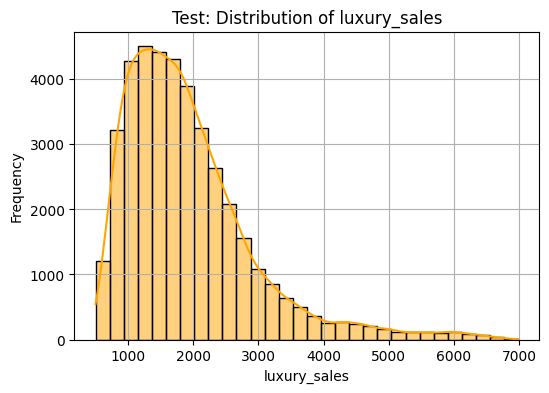

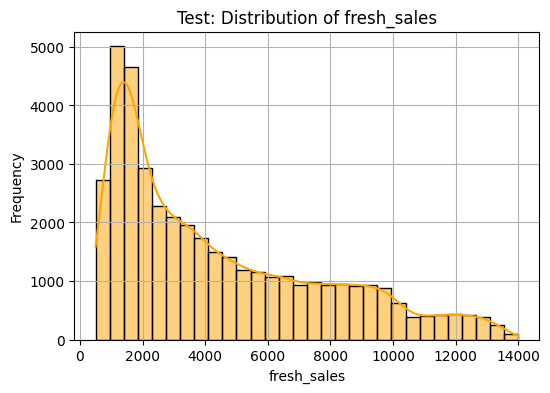

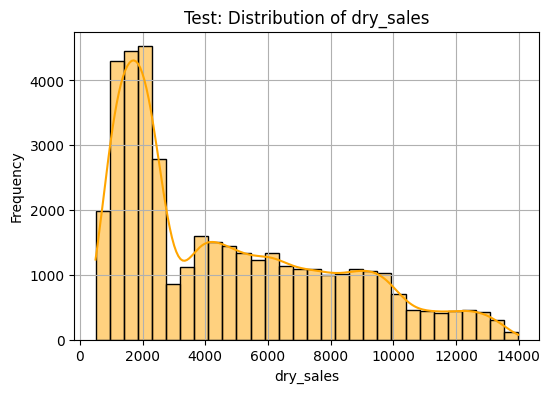

In [ ]:
# Step 11: HISTOGRAMS (Test)
for col in sales_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(test_df[col], kde=True, bins=30, color='orange')
    plt.title(f'Test: Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

* **Justification**: Similar to Step 10, this step visualizes the distribution of numeric data in the test dataset. The orange color differentiates these histograms from the training dataset histograms, making it clear which dataset is being visualized.


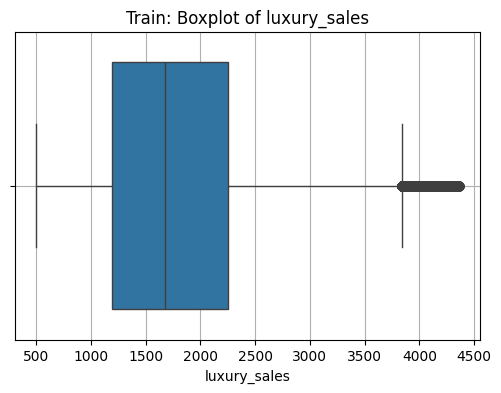

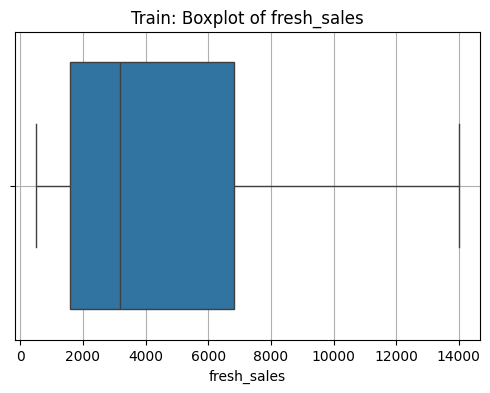

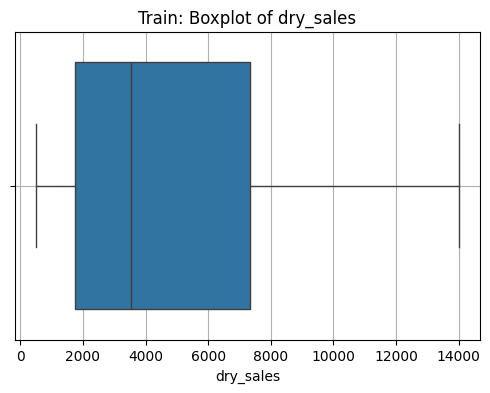

In [ ]:
# Step 12: BOXPLOTS (Train)
for col in sales_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=train_df[col])
    plt.title(f'Train: Boxplot of {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

* **Justification**: Boxplots provide insights into the distribution of numeric data, including the median, interquartile range, and outliers. This step helps identify outliers and skewness in the training dataset.


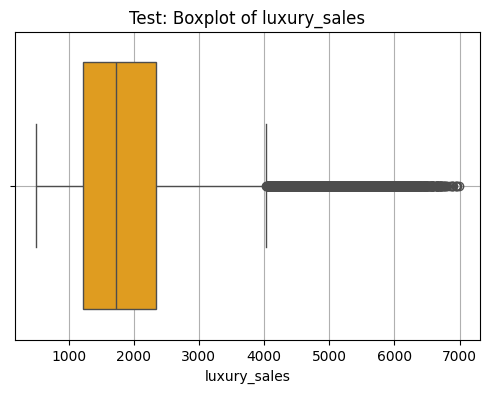

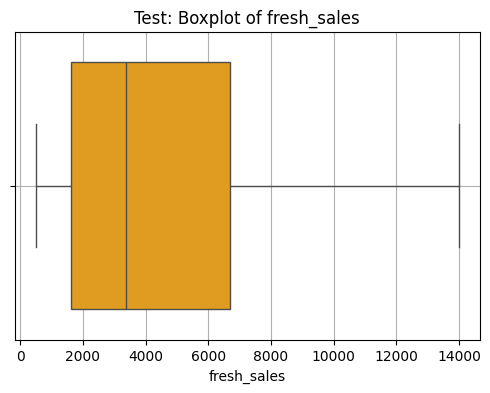

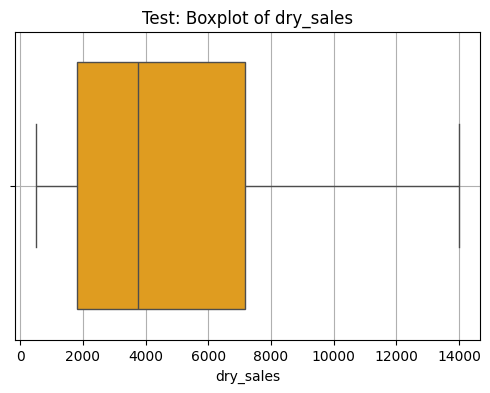

In [ ]:
# Step 13: BOXPLOTS (Test)
for col in sales_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=test_df[col], color='orange')
    plt.title(f'Test: Boxplot of {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

* **Justification**: Similar to Step 12, this step visualizes the distribution of numeric data in the test dataset. The orange color differentiates these boxplots from the training dataset boxplots.


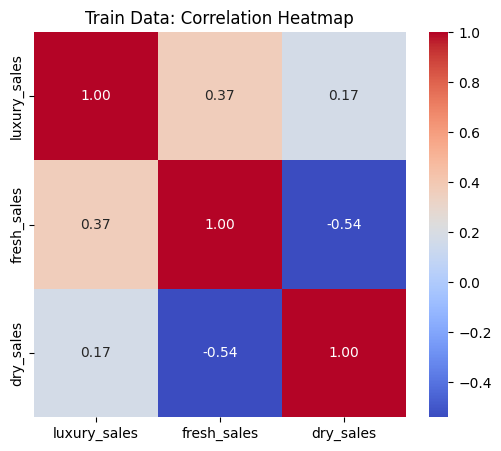

In [ ]:
# Step 14: CORRELATION HEATMAP (Train)
plt.figure(figsize=(6, 5))
sns.heatmap(train_df[sales_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Train Data: Correlation Heatmap")
plt.show()

**Justification**: This step visualizes the linear relationships between pairs of variables in the training dataset. Correlation heatmaps help identify strong or weak relationships, which are important for feature selection and model performance.

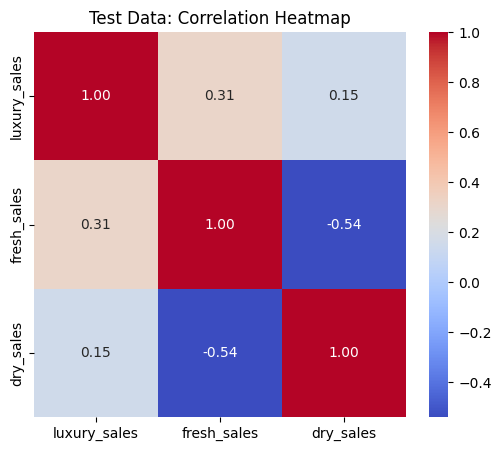

In [ ]:
# Step 15: CORRELATION HEATMAP (Test)
plt.figure(figsize=(6, 5))
sns.heatmap(test_df[sales_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Test Data: Correlation Heatmap")
plt.show()

* **Justification**: Similar to Step 14, this step visualizes the linear relationships between pairs of variables in the test dataset. Comparing the correlation heatmaps of the training and testing datasets ensures consistency in relationships, which is important for model performance.


In [ ]:
# Step 16: Export Cleaned CSVs
train_df.to_csv("preprocessed_train_data.csv", index=False)
test_df.to_csv("preprocessed_test_data.csv", index=False)
print("\n Preprocessed CSVs saved: 'preprocessed_train_data.csv' and 'preprocessed_test_data.csv'")

# Step 17: Download
files.download("preprocessed_train_data.csv")
files.download("preprocessed_test_data.csv")


 Preprocessed CSVs saved: 'preprocessed_train_data.csv' and 'preprocessed_test_data.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Upload your preprocessed training dataset
from google.colab import files
uploaded = files.upload()

# Import pandas and load the dataset
import pandas as pd

train_df = pd.read_csv("preprocessed_train_data.csv")

# Show unique values in cluster_catgeory
print("Unique values in 'cluster_catgeory' column:")
print(train_df["cluster_catgeory"].unique())

Saving preprocessed_train_data.csv to preprocessed_train_data.csv
Unique values in 'cluster_catgeory' column:
['4' '1' '99' '2' '5' '3' '6' '6\\' 4 2 1 95 3 98 5 6 nan 100.0 89.0]


<ipython-input-2-f421eea82b34>:8: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("preprocessed_train_data.csv")  # Make sure filename is correct


In [ ]:
# Clean the correct column with typo fixed: 'cluster_catgeory'
train_df['cluster_catgeory'] = train_df['cluster_catgeory'].astype(str).str.extract('(\d+)')
train_df['cluster_catgeory'] = pd.to_numeric(train_df['cluster_catgeory'], errors='coerce')

# Optional: Keep only valid cluster values (if you expect 1–6 for example)
train_df = train_df[train_df['cluster_catgeory'].isin([1, 2, 3, 4, 5, 6])]

# Reset index
train_df.reset_index(drop=True, inplace=True)

# Check again
print("Cleaned values in 'cluster_catgeory':")
print(train_df['cluster_catgeory'].unique())


Cleaned values in 'cluster_catgeory':
[4. 1. 2. 5. 3. 6.]


# KNN

In [ ]:
# Step 1: Upload the Preprocessed CSVs
from google.colab import files
print("Please upload 'preprocessed_train_data.csv' and 'preprocessed_test_data.csv'")
uploaded = files.upload()

Please upload 'preprocessed_train_data.csv' and 'preprocessed_test_data.csv'


Saving preprocessed_train_data.csv to preprocessed_train_data (1).csv
Saving preprocessed_test_data.csv to preprocessed_test_data (1).csv


* **Justification**: This step allow to upload the preprocessed training and testing datasets (**preprocessed_train_data.csv** and **preprocessed_test_data.csv**) to the Google Colab environment. Uploading
the datasets is necessary to load the cleaned and preprocessed data for model training and evaluation.


In [ ]:
# Step 2: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

* **Justification**: This step imports all the necessary libraries for data manipulation, model training, evaluation, and visualization. Each library serves a specific purpose:
    * **Pandas** and **NumPy** for data manipulation.
    * **Matplotlib** and **Seaborn** for visualization.
    * **train_test_split** for splitting the dataset.
    * **KNeighborsClassifier** for implementing the KNN model.
    * **LabelEncoder** for encoding categorical variables.
    * **accuracy_score**, **classification_report**, and **confusion_matrix** for evaluating model performance.


In [ ]:
# Step 3: Load Preprocessed Datasets
train_df = pd.read_csv("preprocessed_train_data.csv")
test_df = pd.read_csv("preprocessed_test_data.csv")

* **Justification**: This step loads the preprocessed training and testing datasets into Pandas DataFrames. Loading the data is essential for performing any analysis or modeling. The training dataset is used to train the model, while the testing dataset is used to evaluate its performance.


In [ ]:
# Step 4: Encode 'outlet_city' if it's still categorical
from sklearn.preprocessing import LabelEncoder

# Combine train and test outlet_city values before encoding
combined_cities = pd.concat([train_df["outlet_city"], test_df["outlet_city"]], axis=0).astype(str)

# Fit LabelEncoder on combined data
city_encoder = LabelEncoder()
city_encoder.fit(combined_cities)

# Transform both train and test safely
train_df["outlet_city"] = city_encoder.transform(train_df["outlet_city"].astype(str))
test_df["outlet_city"] = city_encoder.transform(test_df["outlet_city"].astype(str))


* **Justification**: This step encodes the **outlet_city** column, which is categorical, into numeric values using **LabelEncoder**. Encoding categorical variables is necessary because machine learning algorithms like KNN require numeric input. Combining the train and test data before encoding ensures that the same encoding is applied consistently to both datasets.


In [ ]:
# Step 5: Define Features and Target
X = train_df.drop(columns=["Customer_ID", "cluster_catgeory"])
y = train_df["cluster_catgeory"]


* **Justification**: This step separates the features (X) and the target variable (y) in the training dataset. The features are all columns except **Customer_ID** (an identifier) and **cluster_catgeory** (the target). The target variable is the column **cluster_catgeory**, which the model will predict.


In [ ]:
# Step 6: Train-Test Split for Validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


* **Justification**: This step splits the training dataset into a training set (**X_train**, **y_train**) and a validation set (**X_val**, **y_val**). The validation set is used to evaluate the model's performance during training and to tune hyperparameters. The **random_state=42** ensures reproducibility.


In [ ]:
# Step 7: Check & Clean Target Column
target_col = "cluster_catgeory"

# Step A: Fill missing values first
train_df[target_col].fillna(train_df[target_col].mode()[0], inplace=True)

# Step B: Extract only digits from any string entries
train_df[target_col] = train_df[target_col].astype(str).str.extract("(\d+)")[0]

# Step C: Drop remaining NaNs if extract failed
train_df = train_df[train_df[target_col].notna()]

# Step D: Convert to int
train_df[target_col] = train_df[target_col].astype(int)


* **Justification**: This step ensures that the target column (cluster_catgeory) is clean and in the correct format. Missing values are filled with the mode, non-numeric characters are removed, and the column is converted to integers. This ensures that the target variable is ready for model training.


In [ ]:
# Step 8: Split Features & Target
X = train_df.drop(columns=["Customer_ID", target_col])
y = train_df[target_col]

* **Justification**: This step redefines the features (X) and target (y) after cleaning the target column. It ensures that the model is trained on the correct and cleaned data.


In [ ]:
# Step 9: Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

* **Justification**: This step repeats the train-test split to ensure that the training and validation sets are consistent with the cleaned data. The validation set is used to evaluate the model's performance.


In [ ]:
# Step 10: Find Optimal K
accuracy_list = []
k_range = range(1, 11)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_val)
    acc = accuracy_score(y_val, y_pred_k)
    accuracy_list.append(acc)
    print(f"k = {k} → Accuracy = {acc:.4f}")

k = 1 → Accuracy = 0.9582
k = 2 → Accuracy = 0.9557
k = 3 → Accuracy = 0.9581
k = 4 → Accuracy = 0.9554
k = 5 → Accuracy = 0.9571
k = 6 → Accuracy = 0.9552
k = 7 → Accuracy = 0.9567
k = 8 → Accuracy = 0.9555
k = 9 → Accuracy = 0.9565
k = 10 → Accuracy = 0.9552


* **Justification**: This step evaluates the KNN model for different values of **k** (number of neighbors) to find the optimal value. The accuracy for each **k** is calculated and stored in **accuracy_list**. This helps in selecting the **k** that gives the best performance on the validation set.


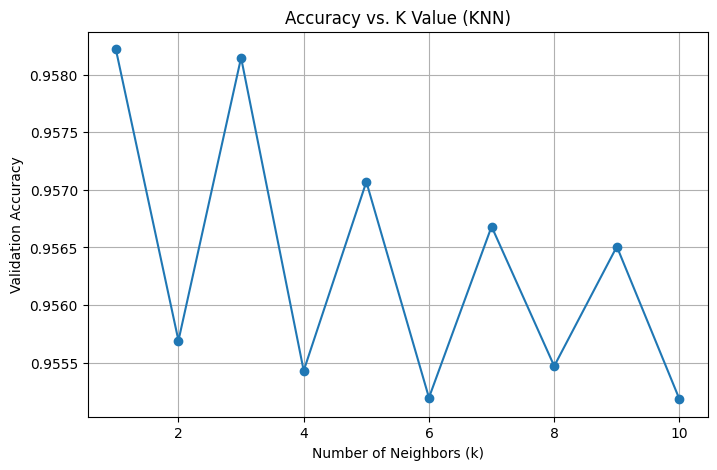

In [ ]:
# Step 11: Plot Accuracy vs K
plt.figure(figsize=(8, 5))
plt.plot(k_range, accuracy_list, marker='o')
plt.title("Accuracy vs. K Value (KNN)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Validation Accuracy")
plt.grid(True)
plt.show()

* **Justification**: This step visualizes the accuracy for different values of **k** using a line plot. The plot helps in identifying the optimal **k** value that maximizes validation accuracy. It provides a clear visual representation of how **k** affects model performance.


In [ ]:
# Step 12: Train Final Model
best_k = accuracy_list.index(max(accuracy_list)) + 1
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

* **Justification**: This step trains the final KNN model using the optimal **k** value identified in Step 10. The model is trained on the entire training set (**X_train**, **y_train**) to ensure it learns the underlying patterns in the data.


In [ ]:
# Step 13: Evaluate on Validation Set
y_val_pred = knn_model.predict(X_val)
print("\n Classification Report:")
print(classification_report(y_val, y_val_pred))


 Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     37864
           2       1.00      1.00      1.00     30798
           3       0.48      0.44      0.46      5436
           4       1.00      1.00      1.00     34431
           5       0.57      0.61      0.59      6606
           6       1.00      1.00      1.00     34153
          95       0.00      0.00      0.00         1
          98       0.00      0.00      0.00         1

    accuracy                           0.96    149290
   macro avg       0.63      0.63      0.63    149290
weighted avg       0.96      0.96      0.96    149290



* **Justification**: This step evaluates the final model on the validation set using a classification report. The report provides metrics like precision, recall, and F1-score, which give a comprehensive view of the model's performance across different classes.


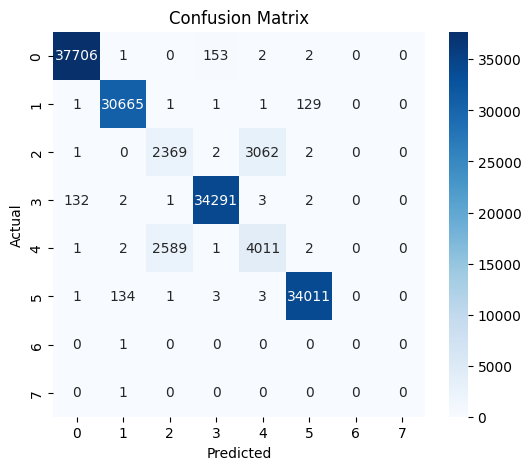

In [ ]:
# Step 14: Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

* **Justification**: This step visualizes the confusion matrix, which shows the number of correct and incorrect predictions for each class. The heatmap provides a clear visual representation of the model's performance, highlighting areas where the model may be struggling.


In [ ]:
# Step 15: Predict on Test Data
X_test = test_df.drop(columns=["Customer_ID"])
test_predictions = knn_model.predict(X_test)

test_df["Predicted_cluster"] = test_predictions

* **Justification**: This step uses the trained KNN model to make predictions on the test dataset. The predictions are stored in a new column (Predicted_cluster) in the test DataFrame. This step is crucial for evaluating the model's performance on unseen data.


In [ ]:
# Step 16: Show Output
print("\n Predicted Clusters for Test Set:")
print(test_df[["Customer_ID", "Predicted_cluster"]].head(10))


 Predicted Clusters for Test Set:
   Customer_ID  Predicted_cluster
0        33574                  1
1        10089                  1
2        38329                  1
3        11376                  1
4        12410                  1
5          826                  1
6        10364                  4
7        39986                  1
8        11133                  1
9        32747                  1


* **Justification**: This step displays the predicted clusters for the first 10 rows of the test dataset. It provides a quick overview of the model's predictions and allows for a sanity check to ensure the predictions are reasonable.


# SVM

In [ ]:
# Step 1: Upload Files
from google.colab import files
uploaded = files.upload()

Saving preprocessed_train_data.csv to preprocessed_train_data (2).csv
Saving preprocessed_test_data.csv to preprocessed_test_data (2).csv


* **Justification**: This step allow to upload the preprocessed training and testing datasets (**preprocessed_train_data.csv** and **preprocessed_test_data.csv**) to the Google Colab. Uploading the datasets is necessary to load the cleaned and preprocessed data for model training and evaluation.


In [ ]:
# Step 2: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


* **Justification**: This step imports all the necessary libraries for data manipulation, model training, evaluation, and visualization. Each library serves a specific purpose:
    * **Pandas** and **NumPy** for data manipulation.
    * **Matplotlib** and **Seaborn** for visualization.
    * **train_test_split** for splitting the dataset.
    * **SVC** for implementing the SVM model.
    * **LabelEncoder** for encoding categorical variables.
    * **accuracy_score**, **classification_report**, and **confusion_matrix** for evaluating model performance.


In [ ]:
# Step 3: Load Data
train_df = pd.read_csv("preprocessed_train_data.csv")
test_df = pd.read_csv("preprocessed_test_data.csv")

<ipython-input-3-80c0284cb20c>:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("preprocessed_train_data.csv")


* **Justification**: This step loads the preprocessed training and testing datasets into Pandas DataFrames. Loading the data is essential for performing any analysis or modeling. The training dataset is used to train the model, while the testing dataset is used to evaluate its performance.


In [ ]:
# Step 4: Encode 'outlet_city' Safely
combined_cities = pd.concat([train_df["outlet_city"], test_df["outlet_city"]], axis=0).astype(str)
city_encoder = LabelEncoder()
city_encoder.fit(combined_cities)

train_df["outlet_city"] = city_encoder.transform(train_df["outlet_city"].astype(str))
test_df["outlet_city"] = city_encoder.transform(test_df["outlet_city"].astype(str))


* **Justification**: This step encodes the **outlet_city** column, which is categorical, into numeric values using **LabelEncoder**. Encoding categorical variables is necessary because machine learning algorithms like SVM require numeric input. Combining the train and test data before encoding ensures that the same encoding is applied consistently to both datasets.


In [ ]:
# Step 5: Clean Target Variable
target_col = "cluster_catgeory"

# Fill missing values using mode
train_df[target_col].fillna(train_df[target_col].mode()[0], inplace=True)

# Extract digits (if any string values exist)
train_df[target_col] = train_df[target_col].astype(str).str.extract("(\d+)")[0]

# Drop remaining NaNs (if any)
train_df = train_df[train_df[target_col].notna()]

# Convert to int
train_df[target_col] = train_df[target_col].astype(int)


<ipython-input-5-5b9664336f49>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[target_col].fillna(train_df[target_col].mode()[0], inplace=True)


* **Justification**: This step ensures that the target column (cluster_catgeory) is clean and in the correct format. Missing values are filled with the mode, non-numeric characters are removed, and the column is converted to integers. This ensures that the target variable is ready for model training.


In [ ]:
# Step 6: Split Features and Target
X = train_df.drop(columns=["Customer_ID", target_col])
y = train_df[target_col]

* **Justification**: This step separates the features (X) and the target variable (y) in the training dataset. The features are all columns except **Customer_ID** (an identifier) and **cluster_catgeory** (the target). The target variable is the column **cluster_catgeory**, which the model will predict.


In [ ]:
# Step 7: Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

* **Justification**: This step splits the training dataset into a training set (**X_train**, **y_train**) and a validation set (**X_val**, **y_val**). The validation set is used to evaluate the model's performance during training and to tune hyperparameters. The **random_state=42** ensures reproducibility.


In [ ]:
# Step 8: Train the SVM Model
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MinMaxScaler

# Scale features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Train faster SVM model
svm_model = LinearSVC(max_iter=10000, dual=False)
svm_model.fit(X_train, y_train)

# Predict
y_pred = svm_model.predict(X_val)

* **Justification**: This step trains the SVM model on the training data. The features are scaled using **MinMaxScaler** to ensure that all features are on the same scale, which is important for SVM. The **LinearSVC** model is used for faster training, and the **max_iter=10000** ensures that the model converges. The model is then used to make predictions on the validation set.


In [ ]:
# Step 9: Evaluate on Validation Set
y_pred = svm_model.predict(X_val)

print("\n Classification Report:")
print(classification_report(y_val, y_pred))


 Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.99      1.00     37864
           2       0.99      0.99      0.99     30798
           3       0.63      0.62      0.62      5436
           4       0.99      1.00      0.99     34431
           5       0.69      0.70      0.69      6606
           6       1.00      1.00      1.00     34153
          89       0.00      0.00      0.00         0
          95       0.00      0.00      0.00         1
          98       0.00      0.00      0.00         1

    accuracy                           0.97    149290
   macro avg       0.59      0.59      0.59    149290
weighted avg       0.97      0.97      0.97    149290



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

* **Justification**: This step evaluates the SVM model on the validation set using a classification report. The report provides metrics like precision, recall, and F1-score, which give a comprehensive view of the model's performance across different classes.


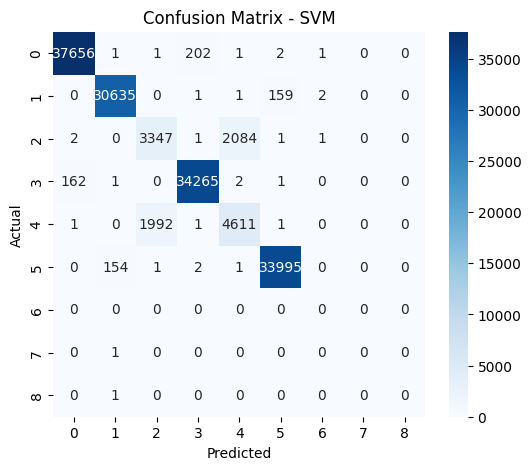

In [ ]:
# Step 10: Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

* **Justification**: This step visualizes the confusion matrix, which shows the number of correct and incorrect predictions for each class. The heatmap provides a clear visual representation of the model's performance, highlighting areas where the model may be struggling.


In [ ]:
# Step 11: Predict on Test Data
X_test = test_df.drop(columns=["Customer_ID"])
test_predictions = svm_model.predict(X_test)
test_df["Predicted_cluster"] = test_predictions


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(


* **Justification**: This step uses the trained SVM model to make predictions on the test dataset. The predictions are stored in a new column (Predicted_cluster) in the test DataFrame. This step is crucial for evaluating the model's performance on unseen data.


In [ ]:
# Step 12: Display Output
print("\n Predicted Clusters for Test Set:")
print(test_df[["Customer_ID", "Predicted_cluster"]].head(10))


 Predicted Clusters for Test Set:
   Customer_ID  Predicted_cluster
0        33574                  1
1        10089                  1
2        38329                  1
3        11376                  1
4        12410                  1
5          826                  1
6        10364                  1
7        39986                  1
8        11133                  1
9        32747                  1


* **Justification**: This step displays the predicted clusters for the first 10 rows of the test dataset. It provides a quick overview of the model's predictions and allows for a sanity check to ensure the predictions are reasonable.


In [ ]:
# Step 13: Export Prediction (Optional)
test_df.to_csv("svm_test_predictions.csv", index=False)

* **Justification**: This step saves the test dataset with the predicted clusters to a CSV file (svm_test_predictions.csv). This is useful for sharing the results or using them in further analysis. The **index=False** argument ensures that the DataFrame index is not saved as a separate column in the CSV file.


# Logistic Regression

In [ ]:
# Step 1: Upload the preprocessed CSV files
from google.colab import files
print("Please upload 'preprocessed_train_data.csv' and 'preprocessed_test_data.csv'")
uploaded = files.upload()

Please upload 'preprocessed_train_data.csv' and 'preprocessed_test_data.csv'


Saving preprocessed_train_data.csv to preprocessed_train_data (3).csv
Saving preprocessed_test_data.csv to preprocessed_test_data (3).csv


* **Justification**: This step allow to upload the preprocessed training and testing datasets (preprocessed_train_data.csv and preprocessed_test_data.csv) to the Google Colab environment. Uploading the datasets is necessary to load the cleaned and preprocessed data for model training and evaluation.


In [ ]:
# Step 2: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


* **Justification**: This step imports all the necessary libraries for data manipulation, model training, evaluation, and visualization. Each library serves a specific purpose:
    * **Pandas** and **NumPy** for data manipulation.
    * **Matplotlib** and **Seaborn** for visualization.
    * **train_test_split** for splitting the dataset.
    * **LogisticRegression** for implementing the logistic regression model.
    * **LabelEncoder** for encoding categorical variables.
    * **accuracy_score**, **classification_report**, and **confusion_matrix** for evaluating model performance.


In [ ]:
# Step 3: Load Datasets
train_df = pd.read_csv("preprocessed_train_data.csv")
test_df = pd.read_csv("preprocessed_test_data.csv")

<ipython-input-16-19942157bfca>:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("preprocessed_train_data.csv")


* **Justification**: This step loads the preprocessed training and testing datasets into Pandas DataFrames. Loading the data is essential for performing any analysis or modeling. The training dataset is used to train the model, while the testing dataset is used to evaluate its performance.


In [ ]:
# Step 4: Encode 'outlet_city' Safely
combined_cities = pd.concat([train_df["outlet_city"], test_df["outlet_city"]], axis=0).astype(str)
city_encoder = LabelEncoder()
city_encoder.fit(combined_cities)

train_df["outlet_city"] = city_encoder.transform(train_df["outlet_city"].astype(str))
test_df["outlet_city"] = city_encoder.transform(test_df["outlet_city"].astype(str))


* **Justification**: This step encodes the **outlet_city** column, which is categorical, into numeric values using **LabelEncoder**. Encoding categorical variables is necessary because machine learning algorithms like logistic regression require numeric input. Combining the train and test data before encoding ensures that the same encoding is applied consistently to both datasets.


In [ ]:
# Step 5: Clean and Convert Target Variable
target_col = "cluster_catgeory"  # Adjust this if your column is named differently

# Fill missing values (if any)
train_df[target_col].fillna(train_df[target_col].mode()[0], inplace=True)

# Extract digits and convert to int
train_df[target_col] = train_df[target_col].astype(str).str.extract("(\d+)")[0]
train_df = train_df[train_df[target_col].notna()]
train_df[target_col] = train_df[target_col].astype(int)


<ipython-input-18-7d75b68aca36>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[target_col].fillna(train_df[target_col].mode()[0], inplace=True)


* **Justification**: This step ensures that the target column (cluster_catgeory) is clean and in the correct format. Missing values are filled with the mode, non-numeric characters are removed, and the column is converted to integers. This ensures that the target variable is ready for model training.


In [ ]:
# Step 6: Feature Scaling
scaler = MinMaxScaler()
numeric_features = ["luxury_sales", "fresh_sales", "dry_sales"]
train_df[numeric_features] = scaler.fit_transform(train_df[numeric_features])
test_df[numeric_features] = scaler.transform(test_df[numeric_features])


* **Justification**: This step scales the numeric features to a range of 0 to 1 using **MinMaxScaler**. Scaling is important for logistic regression because it ensures that all features contribute equally to the model and prevents features with larger magnitudes from dominating the model.


In [ ]:
# Step 7: Define Features and Target
X = train_df.drop(columns=["Customer_ID", target_col])
y = train_df[target_col]

* **Justification**: This step separates the features (X) and the target variable (y) in the training dataset. The features are all columns except **Customer_ID** (an identifier) and **cluster_catgeory** (the target). The target variable is the column **cluster_catgeory**, which the model will predict.


In [ ]:
# Step 8: Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


* **Justification**: This step splits the training dataset into a training set (**X_train**, **y_train**) and a validation set (**X_val**, **y_val**). The validation set is used to evaluate the model's performance during training and to tune hyperparameters. The **random_state=42** ensures reproducibility.


In [ ]:
# Step 9: Train Logistic Regression Model
logreg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logreg_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial')

* **Justification**: This step trains the logistic regression model on the training data. The **multi_class='multinomial'** argument is used for multi-class classification, and the **solver='lbfgs'** is chosen for its efficiency. The **max_iter=1000** ensures that the model converges.



 Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.99      1.00     37864
           2       0.99      1.00      1.00     30798
           3       0.62      0.60      0.61      5436
           4       0.99      0.99      0.99     34431
           5       0.68      0.70      0.69      6606
           6       1.00      1.00      1.00     34153
          95       0.00      0.00      0.00         1
          98       0.00      0.00      0.00         1

    accuracy                           0.97    149290
   macro avg       0.66      0.66      0.66    149290
weighted avg       0.97      0.97      0.97    149290


 Confusion Matrix:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


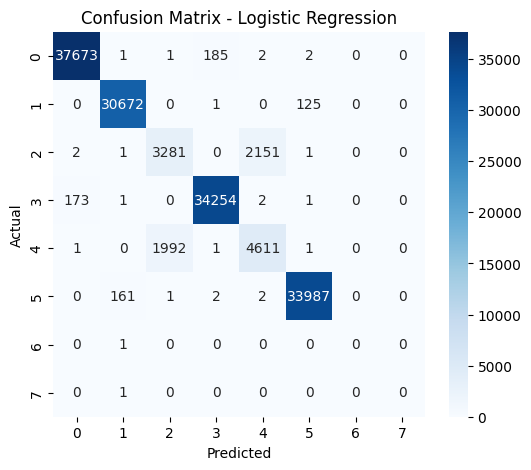

In [ ]:
# Step 10: Evaluate on Validation Set
y_pred = logreg_model.predict(X_val)

print("\n Classification Report:")
print(classification_report(y_val, y_pred))

print("\n Confusion Matrix:")
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

* **Justification**: This step evaluates the logistic regression model on the validation set using a classification report and a confusion matrix. The classification report provides metrics like precision, recall, and F1-score, while the confusion matrix visualizes the number of correct and incorrect predictions for each class.


In [ ]:
# Step 11: Predict on Test Dataset
X_test = test_df.drop(columns=["Customer_ID"])
test_predictions = logreg_model.predict(X_test)
test_df["Predicted_cluster"] = test_predictions

* **Justification**: This step uses the trained logistic regression model to make predictions on the test dataset. The predictions are stored in a new column (Predicted_cluster) in the test DataFrame. This step is crucial for evaluating the model's performance on unseen data.


In [ ]:
# Step 12: Display Output
print("\n Predicted Clusters for Test Dataset:")
print(test_df[["Customer_ID", "Predicted_cluster"]].head(10))


 Predicted Clusters for Test Dataset:
   Customer_ID  Predicted_cluster
0        33574                  1
1        10089                  1
2        38329                  1
3        11376                  1
4        12410                  1
5          826                  1
6        10364                  4
7        39986                  1
8        11133                  1
9        32747                  1


* **Justification**: This step displays the predicted clusters for the first 10 rows of the test dataset. It provides a quick overview of the model's predictions and allows for a sanity check to ensure the predictions are reasonable.


In [ ]:
# Step 13: Export
test_df.to_csv("logistic_regression_test_predictions.csv", index=False)

* **Justification**: This step saves the test dataset with the predicted clusters to a CSV file (logistic_regression_test_predictions.csv). This is useful for sharing the results or using them in further analysis. The **index=False** argument ensures that the DataFrame index is not saved as a separate column in the CSV file.


# Random Forest

In [ ]:
# Step 1: Upload the preprocessed CSVs
from google.colab import files
print("Upload preprocessed_train_data.csv and preprocessed_test_data.csv")
uploaded = files.upload()

Upload preprocessed_train_data.csv and preprocessed_test_data.csv


Saving preprocessed_train_data.csv to preprocessed_train_data (4).csv
Saving preprocessed_test_data.csv to preprocessed_test_data (4).csv


**Justification**: This step allow to upload the preprocessed training and testing datasets (**preprocessed_train_data.csv** and **preprocessed_test_data**.csv) to the Google Colab environment. Uploading the datasets is necessary to load the cleaned and preprocessed data for model training and evaluation.

In [ ]:
# Step 2: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


* **Justification**: This step imports all the necessary libraries for data manipulation, model training, evaluation, and visualization. Each library serves a specific purpose:
    * **Pandas** and **NumPy** for data manipulation.
    * **Matplotlib** and **Seaborn** for visualization.
    * **train_test_split** for splitting the dataset.
    * **RandomForestClassifier** for implementing the Random Forest model.
    * **LabelEncoder** for encoding categorical variables.
    * **accuracy_score**, **classification_report**, and **confusion_matrix** for evaluating model performance.


In [ ]:
# Step 3: Load the Data
train_df = pd.read_csv("preprocessed_train_data.csv")
test_df = pd.read_csv("preprocessed_test_data.csv")


<ipython-input-30-ac5c67fdf573>:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("preprocessed_train_data.csv")


* **Justification**: This step loads the preprocessed training and testing datasets into Pandas DataFrames. Loading the data is essential for performing any analysis or modeling. The training dataset is used to train the model, while the testing dataset is used to evaluate its performance.


In [ ]:
# Step 4: Encode 'outlet_city'
combined_cities = pd.concat([train_df["outlet_city"], test_df["outlet_city"]], axis=0).astype(str)
city_encoder = LabelEncoder()
city_encoder.fit(combined_cities)

train_df["outlet_city"] = city_encoder.transform(train_df["outlet_city"].astype(str))
test_df["outlet_city"] = city_encoder.transform(test_df["outlet_city"].astype(str))


**Justification**: This step encodes the **outlet_city** column, which is categorical, into numeric values using **LabelEncoder**. Encoding categorical variables is necessary because machine learning algorithms like Random Forest require numeric input. Combining the train and test data before encoding ensures that the same encoding is applied consistently to both datasets.

In [ ]:
# Step 5: Clean and Convert Target Column
target_col = "cluster_catgeory"

# Handle missing values
train_df[target_col].fillna(train_df[target_col].mode()[0], inplace=True)

# Extract only numeric digits from strings if necessary
train_df[target_col] = train_df[target_col].astype(str).str.extract(r'(\d+)')[0]
train_df = train_df[train_df[target_col].notna()]
train_df[target_col] = train_df[target_col].astype(int)


<ipython-input-32-63288e4aef2c>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[target_col].fillna(train_df[target_col].mode()[0], inplace=True)


* **Justification**: This step ensures that the target column (cluster_catgeory) is clean and in the correct format. Missing values are filled with the mode, non-numeric characters are removed, and the column is converted to integers. This ensures that the target variable is ready for model training.


In [ ]:
# Step 6: Feature Scaling (MinMaxScaler)
scaler = MinMaxScaler()
numeric_features = ['luxury_sales', 'fresh_sales', 'dry_sales']
train_df[numeric_features] = scaler.fit_transform(train_df[numeric_features])
test_df[numeric_features] = scaler.transform(test_df[numeric_features])


* **Justification**: This step scales the numeric features to a range of 0 to 1 using **MinMaxScaler**. Scaling is important for ensuring that all features contribute equally to the model and prevents features with larger magnitudes from dominating the model.


In [ ]:
# Step 7: Define Features and Target
X = train_df.drop(columns=["Customer_ID", target_col])
y = train_df[target_col]

* **Justification**: This step separates the features (X) and the target variable (y) in the training dataset. The features are all columns except **Customer_ID** (an identifier) and **cluster_catgeory** (the target). The target variable is the column **cluster_catgeory**, which the model will predict.


In [ ]:
# Step 8: Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

* **Justification**: This step splits the training dataset into a training set (**X_train**, **y_train**) and a validation set (**X_val**, **y_val**). The validation set is used to evaluate the model's performance during training and to tune hyperparameters. The **random_state=42** ensures reproducibility.


In [ ]:
# Step 9: Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

* **Justification**: This step trains the Random Forest model on the training data. The **n_estimators=100** argument specifies the number of trees in the forest, and the **random_state=42** ensures reproducibility. Random Forest is chosen for its ability to handle complex datasets and reduce overfitting.



 Classification Report:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00     37864
           2       1.00      1.00      1.00     30798
           3       1.00      1.00      1.00      5436
           4       1.00      1.00      1.00     34431
           5       1.00      1.00      1.00      6606
           6       1.00      1.00      1.00     34153
          95       0.00      0.00      0.00         1
          98       0.00      0.00      0.00         1

    accuracy                           1.00    149290
   macro avg       0.75      0.75      0.75    149290
weighted avg       1.00      1.00      1.00    149290


 Confusion Matrix:


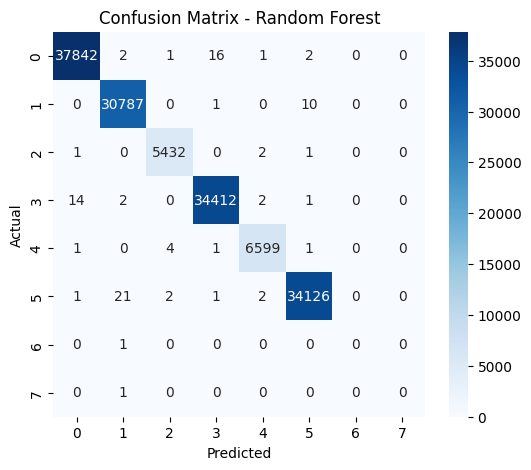

In [ ]:
# Step 10: Evaluate Model on Validation Set
y_val_pred = rf_model.predict(X_val)
print("\n Classification Report:")
print(classification_report(y_val, y_val_pred))

print("\n Confusion Matrix:")
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

* **Justification**: This step evaluates the Random Forest model on the validation set using a classification report and a confusion matrix. The classification report provides metrics like precision, recall, and F1-score, while the confusion matrix visualizes the number of correct and incorrect predictions for each class.


In [ ]:
# Step 11: Predict on Test Data
X_test = test_df.drop(columns=["Customer_ID"])
test_predictions = rf_model.predict(X_test)
test_df["Predicted_cluster"] = test_predictions

* **Justification**: This step uses the trained Random Forest model to make predictions on the test dataset. The predictions are stored in a new column (Predicted_cluster) in the test DataFrame. This step is crucial for evaluating the model's performance on unseen data.



In [ ]:
# Step 12: Display Predictions
print("\n Predicted Clusters for Test Dataset:")
print(test_df[["Customer_ID", "Predicted_cluster"]].head(10))



 Predicted Clusters for Test Dataset:
   Customer_ID  Predicted_cluster
0        33574                  1
1        10089                  4
2        38329                  4
3        11376                  4
4        12410                  4
5          826                  4
6        10364                  4
7        39986                  1
8        11133                  1
9        32747                  4


* **Justification**: This step displays the predicted clusters for the first 10 rows of the test dataset. It provides a quick overview of the model's predictions and allows for a sanity check to ensure the predictions are reasonable.


In [ ]:
# Step 13: Export Predictions (Optional)
test_df.to_csv("random_forest_test_predictions.csv", index=False)

* **Justification**: This step saves the test dataset with the predicted clusters to a CSV file (random_forest_test_predictions.csv). This is useful for sharing the results or using them in further analysis. The **index=False** argument ensures that the DataFrame index is not saved as a separate column in the CSV file.


# Decision Tree Classifier

In [ ]:
# Step 1: Upload CSV files
from google.colab import files
print("Upload 'preprocessed_train_data.csv' and 'preprocessed_test_data.csv'")
uploaded = files.upload()

Upload 'preprocessed_train_data.csv' and 'preprocessed_test_data.csv'


Saving preprocessed_train_data.csv to preprocessed_train_data (5).csv
Saving preprocessed_test_data.csv to preprocessed_test_data (5).csv


* **Justification**: This step allows you to upload the preprocessed training and testing datasets (**preprocessed_train_data.csv** and **preprocessed_test_data.csv**) to the Google Colab environment. Uploading the datasets is necessary to load the cleaned and preprocessed data for model training and evaluation.


In [ ]:
# Step 2: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

* **Justification**: This step imports all the necessary libraries for data manipulation, model training, evaluation, and visualization. Each library serves a specific purpose:
    * **Pandas** and **NumPy** for data manipulation.
    * **Matplotlib** and **Seaborn** for visualization.
    * **train_test_split** for splitting the dataset.
    * **DecisionTreeClassifier** for implementing the Decision Tree model.
    * **LabelEncoder** for encoding categorical variables.
    * **accuracy_score**, **classification_report**, and **confusion_matrix** for evaluating model performance.


In [ ]:
# Step 3: Load Datasets
train_df = pd.read_csv("preprocessed_train_data.csv")
test_df = pd.read_csv("preprocessed_test_data.csv")

<ipython-input-43-19942157bfca>:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("preprocessed_train_data.csv")


* **Justification**: This step loads the preprocessed training and testing datasets into Pandas DataFrames. Loading the data is essential for performing any analysis or modeling. The training dataset is used to train the model, while the testing dataset is used to evaluate its performance.


In [ ]:
# Step 4: Encode 'outlet_city' Safely
combined_cities = pd.concat([train_df["outlet_city"], test_df["outlet_city"]], axis=0).astype(str)
city_encoder = LabelEncoder()
city_encoder.fit(combined_cities)

train_df["outlet_city"] = city_encoder.transform(train_df["outlet_city"].astype(str))
test_df["outlet_city"] = city_encoder.transform(test_df["outlet_city"].astype(str))

* **Justification**: This step encodes the **outlet_city** column, which is categorical, into numeric values using **LabelEncoder**. Encoding categorical variables is necessary because machine learning algorithms like Decision Trees require numeric input. Combining the train and test data before encoding ensures that the same encoding is applied consistently to both datasets.


In [ ]:
# Step 5: Clean & Convert Target Column
target_col = "cluster_catgeory"

train_df[target_col].fillna(train_df[target_col].mode()[0], inplace=True)
train_df[target_col] = train_df[target_col].astype(str).str.extract("(\d+)")[0]
train_df = train_df[train_df[target_col].notna()]
train_df[target_col] = train_df[target_col].astype(int)

<ipython-input-45-02c3c71debf5>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[target_col].fillna(train_df[target_col].mode()[0], inplace=True)


* **Justification**: This step ensures that the target column (cluster_catgeory) is clean and in the correct format. Missing values are filled with the mode, non-numeric characters are removed, and the column is converted to integers. This ensures that the target variable is ready for model training.


In [ ]:
# Step 6: Feature Scaling
scaler = MinMaxScaler()
numeric_cols = ['luxury_sales', 'fresh_sales', 'dry_sales']
train_df[numeric_cols] = scaler.fit_transform(train_df[numeric_cols])
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])

* **Justification**: This step scales the numeric features to a range of 0 to 1 using **MinMaxScaler**. Scaling is important for ensuring that all features contribute equally to the model and prevents features with larger magnitudes from dominating the model.


In [ ]:
# Step 7: Define Features and Target
X = train_df.drop(columns=["Customer_ID", target_col])
y = train_df[target_col]

* **Justification**: This step separates the features (X) and the target variable (y) in the training dataset. The features are all columns except **Customer_ID** (an identifier) and **cluster_catgeory** (the target). The target variable is the column **cluster_catgeory**, which the model will predict.


In [ ]:
# Step 8: Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


* **Justification**: This step splits the training dataset into a training set (**X_train**, **y_train**) and a validation set (**X_val**, **y_val**). The validation set is used to evaluate the model's performance during training and to tune hyperparameters. The **random_state=42** ensures reproducibility.


In [ ]:
# Step 9: Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

* **Justification**: This step trains the Decision Tree model on the training data. The **criterion='entropy'** argument specifies the function to measure the quality of a split, and the **max_depth=5** limits the depth of the tree to prevent overfitting. The **random_state=42** ensures reproducibility.



 Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.98      0.96     37864
           2       0.84      0.96      0.90     30798
           3       0.80      0.62      0.70      5436
           4       0.98      0.93      0.95     34431
           5       0.73      0.88      0.80      6606
           6       0.96      0.83      0.89     34153
          95       0.00      0.00      0.00         1
          98       0.00      0.00      0.00         1

    accuracy                           0.91    149290
   macro avg       0.66      0.65      0.65    149290
weighted avg       0.92      0.91      0.91    149290


 Confusion Matrix:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


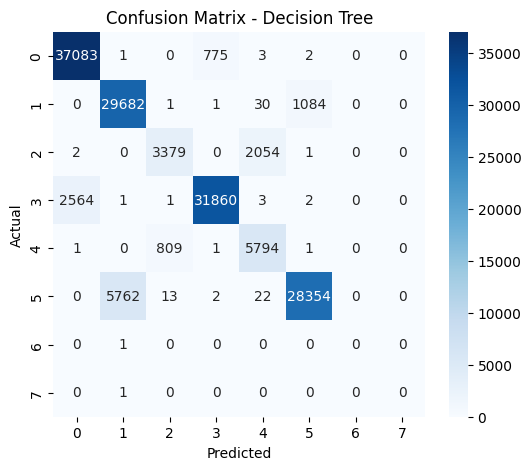

In [ ]:
# Step 10: Evaluate the Model
y_val_pred = dt_model.predict(X_val)

print("\n Classification Report:")
print(classification_report(y_val, y_val_pred))

print("\n Confusion Matrix:")
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

* **Justification**: This step evaluates the Decision Tree model on the validation set using a classification report and a confusion matrix. The classification report provides metrics like precision, recall, and F1-score, while the confusion matrix visualizes the number of correct and incorrect predictions for each class.


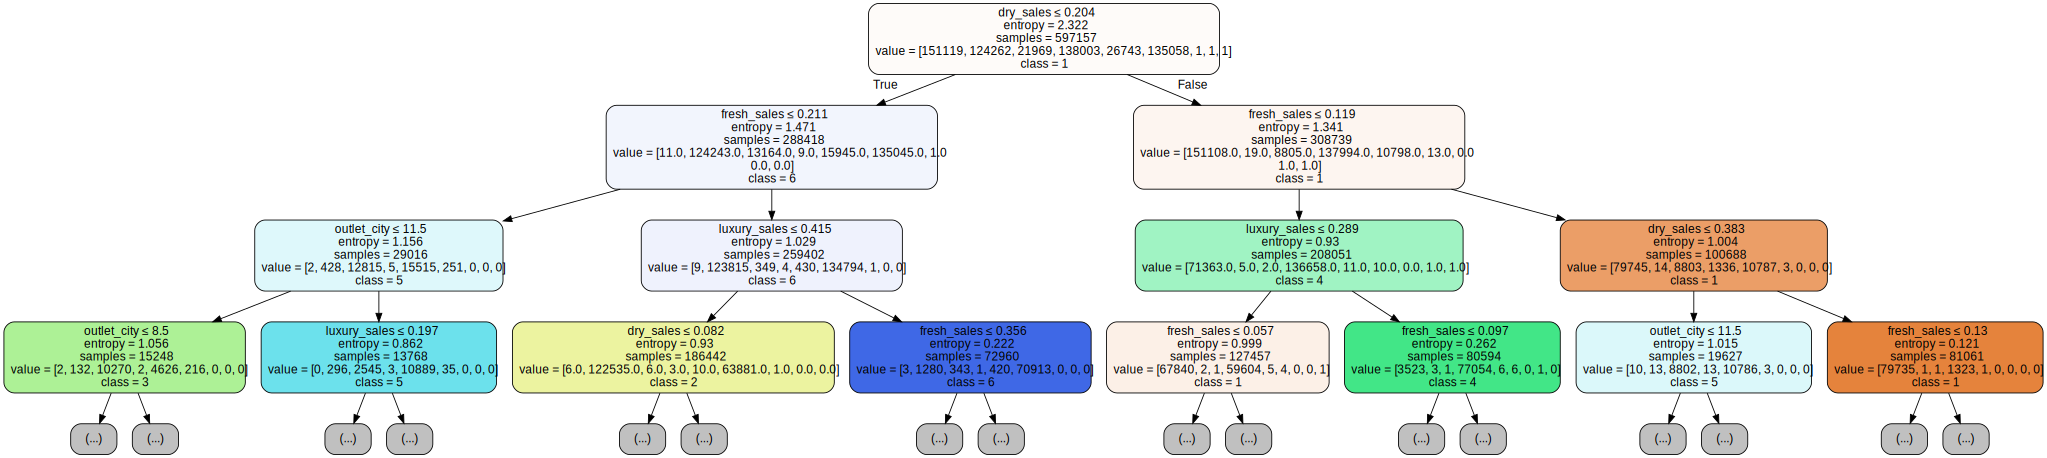

In [ ]:
# Step 11: Improved Decision Tree Visualization (High Clarity)

from sklearn.tree import export_graphviz
import graphviz

# Export tree to DOT format
dot_data = export_graphviz(
    dt_model,
    out_file=None,
    feature_names=X.columns,
    class_names=[str(cls) for cls in dt_model.classes_],
    filled=True,
    rounded=True,
    special_characters=True,
    max_depth=3
)

# Render using Graphviz
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format='pdf', cleanup=True)
graph.view()

# Optional: Show inline in Colab as SVG
from IPython.display import SVG
graph_svg = graphviz.Source(dot_data, format='svg')
display(SVG(graph_svg.pipe(format='svg')))


* **Justification**: This step visualizes the Decision Tree model using Graphviz. The visualization provides a clear and interpretable representation of the tree structure, including decision rules and splits. The **max_depth=3** argument limits the depth of the tree for better readability.


In [ ]:
# Step 12: Predict on Test Dataset
X_test = test_df.drop(columns=["Customer_ID"])
test_predictions = dt_model.predict(X_test)
test_df["Predicted_cluster"] = test_predictions


* **Justification**: This step uses the trained Decision Tree model to make predictions on the test dataset. The predictions are stored in a new column (Predicted_cluster) in the test DataFrame. This step is crucial for evaluating the model's performance on unseen data.


In [ ]:
# Step 13: Display Output
print("\n Predicted Clusters for Test Dataset:")
print(test_df[["Customer_ID", "Predicted_cluster"]].head(10))



 Predicted Clusters for Test Dataset:
   Customer_ID  Predicted_cluster
0        33574                  1
1        10089                  1
2        38329                  1
3        11376                  1
4        12410                  1
5          826                  1
6        10364                  4
7        39986                  1
8        11133                  1
9        32747                  1


**Justification**: This step displays the predicted clusters for the first 10
rows of the test dataset. It provides a quick overview of the model's predictions and allows for a sanity check to ensure the predictions are reasonable.

In [ ]:
# Step 14: Export (Optional)
test_df.to_csv("decision_tree_test_predictions.csv", index=False)

**Justification**: This step saves the test dataset with the predicted clusters (Predicted_cluster) to a CSV file named **decision_tree_test_predictions.csv**.